In [29]:
import pandas as pd
import numpy as np

In [30]:
text = pd.read_csv("/content/text.csv")
vocab = pd.read_csv("/content/vocab.csv")

Выполнить соединение по столбцу WORD; в полученной таблице будут три столбца --- WORDNO, WORD и POS (part of speech)

In [ ]:
tv = text.merge(vocab, on="WORD")

tv

Отфильтровать строки, которые следуют за строкой с таким же значением POS

In [ ]:
two_eq_pos_inarow = tv[tv['POS']==tv.shift(-1)['POS']]

two_eq_pos_inarow

Сделать группировку по полю POS



In [33]:
tvgroupby = tv.groupby('POS')


В каждой группе вычислить скользящее среднее значение длины слова

In [42]:
rl = []

for i in tv.groupby('POS'):
  rl.append([k for k in pd.Series([len(j) for j in i[1]["WORD"]]).rolling(window = 10).mean().tail(20)])


In [43]:
rm = pd.DataFrame(rl, index = [i[0] for i in tv.groupby('POS')])


Нарисовать диаграмму и сохранить ее в файл

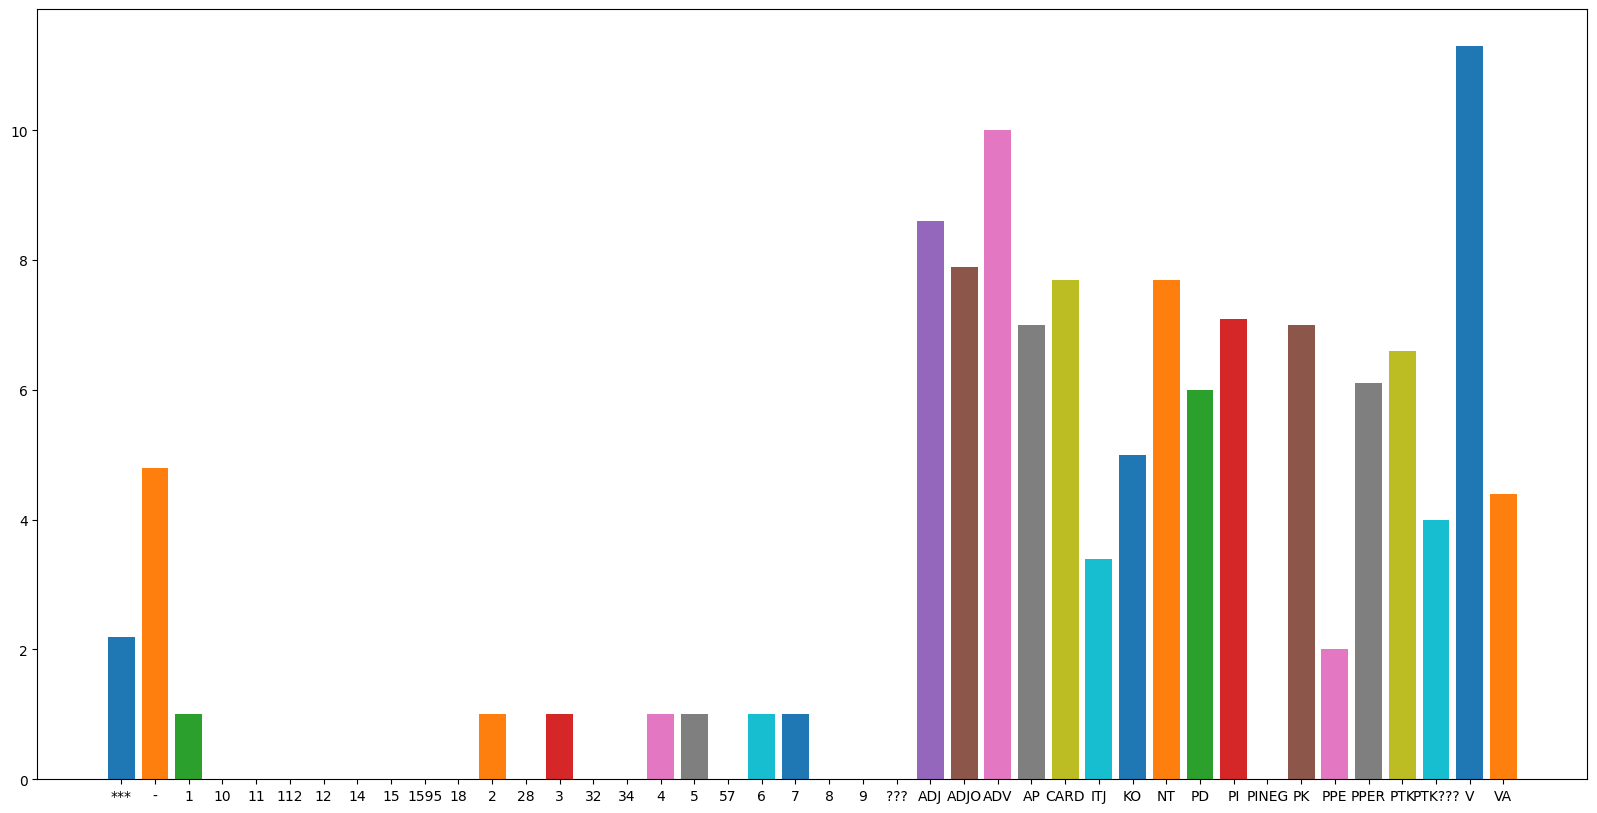

In [44]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


figure(figsize=(20, 10))

for i in rm.T:
    plt.bar(i, rm.loc[i])

plt.savefig('hwtextvocab.png')

plt.show()

In [45]:
rm.to_html('dasha-tv-hw.html')